<a href="https://colab.research.google.com/github/jnsbrdbr/new_thesiis/blob/main/9.4_Tlogesticregression1320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import jaccard_score
from scipy.spatial.distance import pdist, squareform

In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip3 install pickle5
import pickle5 as pickle

In [ ]:
with open('/content/drive/MyDrive/10000/Tresult.pkl', "rb") as fh:
  result = pickle.load(fh)

In [ ]:
#final data
print(result)

               0         1         2         3         4         5         6  \
0      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
1      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
2      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
3      -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
4      -2.178710 -3.260547 -0.698874 -1.030967 -0.723695 -1.028303 -0.406622   
...          ...       ...       ...       ...       ...       ...       ...   
13209  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13210  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13211  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13212  -2.178515 -3.260148 -0.698552 -1.030417 -0.723180 -1.027433 -0.405889   
13213  27.606119  6.905609  0.154864  0.191890  0.097248  0.114301  0.021144   

              7         8         9  ..

# **logestic** **regression**

In [ ]:
#divide data in to data_label and non_data label

import copy
result_nonlabel=copy.deepcopy(result)
del result_nonlabel['label']
X=result_nonlabel
y=result.label

In [ ]:
#splitting data in to test and train...

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                   shuffle=True)

In [ ]:
#train the data

from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(max_iter=1000000,penalty='l2', C=0.01,solver='lbfgs')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=0.01, max_iter=1000000)

In [ ]:
#score of data by prediction at once

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.8690881573968975


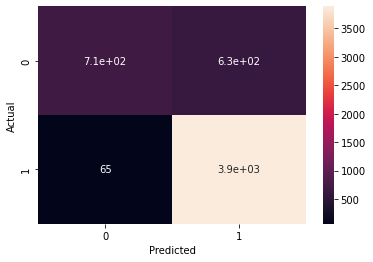

In [ ]:
#plotting confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [ ]:
#Accuracy by prediction in once

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.8690881573968975


In [ ]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 3888
False Positives: 627
True Negatives: 706
False Negatives: 65


In [ ]:
#cross_validation and accracy

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, shuffle=True)#, random_state=42
scores = cross_val_score(logisticRegr, X, y, scoring='accuracy', cv=cv)

print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.882 (0.006)


In [ ]:
#recall

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict


cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_recall = cross_val_score(logisticRegr,X, y, scoring='recall', cv=cv)

print('scores_recall: %.3f (%.3f)' % (mean(scores_recall), std(scores_recall)))

scores_recall: 0.983 (0.003)


In [ ]:
#precision

from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


cv = KFold(n_splits=10, shuffle=True)#, shuffle=True, random_state=42
scores_precision = cross_val_score(logisticRegr, X, y, scoring='precision', cv=cv)

print('scores_precision: %.3f (%.3f)' % (mean(scores_precision), std(scores_precision)))

scores_precision: 0.874 (0.007)


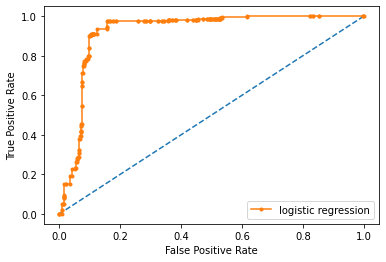


 Logistic ROC AUC 0.922


In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


logisticRegr = LogisticRegression(max_iter=1000000,penalty='l2', C=0.01,solver='lbfgs')
logisticRegr.fit(x_train, y_train)
yhat = logisticRegr.predict_proba(x_test)
pos_probs = yhat[:,1]
pyplot.plot([1, 0], [1, 0], linestyle='--')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='logistic regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
roc_auc = roc_auc_score(y_test, pos_probs)
print('\n','Logistic ROC AUC %.3f' % roc_auc)

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
 

 
#Implementing cross validation
 
#X = X.sample(frac = 1)
#y= y.sample(frac = 1)
kf = KFold(n_splits=10)#, random_state=None
model = LogisticRegression(max_iter=1000000,penalty='l2', C=0.01,solver='lbfgs')#(solver= 'liblinear')
 
acc_score = list()
res_tpr = list()
res_fpr = list()
for train_index , test_index in kf.split(X):
  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, pred_values, labels=[0, 1]).ravel()
    print(f'True Positives: {tp}')
    print(f'False Positives: {fp}')
    print(f'True Negatives: {tn}')
    print(f'False Negatives: {fn}')
    tpr=(np.divide(tp,(tp+fn)))
    fpr=(np.divide(fp,(fp+tn)))
    if tp==0:
      tpr=0
    if fp==0:
      fpr=0

    print('tpr=%.4f fpr=%.3f' % ( mean(tpr), mean(fpr)))
    print('x')
    res_tpr.append(mean(tpr))
    res_fpr.append(mean(fpr))
    print('---------------------')

    acc = accuracy_score(pred_values , y_test)
    acc_score.append(acc)
     
avg_acc_score = np.sum(acc_score)/10
total_tpr=np.sum(res_tpr)/10
total_fpr=np.sum(res_fpr)/10
print('\n\n',' total_tpr=%.4f total_fpr=%.3f' % (total_tpr,total_fpr))
#print('\n\n','accuracy of each fold - {}'.format(acc_score))
print('\n\n','Avg accuracy : {}'.format(avg_acc_score))

True Positives: 3866
False Positives: 640
True Negatives: 706
False Negatives: 74
tpr=0.9812 fpr=0.475
x
---------------------
True Positives: 3857
False Positives: 628
True Negatives: 730
False Negatives: 71
tpr=0.9819 fpr=0.462
x
---------------------
True Positives: 3938
False Positives: 589
True Negatives: 698
False Negatives: 61
tpr=0.9847 fpr=0.458
x
---------------------
True Positives: 3924
False Positives: 586
True Negatives: 695
False Negatives: 81
tpr=0.9798 fpr=0.457
x
---------------------
True Positives: 3891
False Positives: 627
True Negatives: 692
False Negatives: 76
tpr=0.9808 fpr=0.475
x
---------------------
True Positives: 3916
False Positives: 591
True Negatives: 716
False Negatives: 63
tpr=0.9842 fpr=0.452
x
---------------------
True Positives: 3896
False Positives: 622
True Negatives: 695
False Negatives: 73
tpr=0.9816 fpr=0.472
x
---------------------
True Positives: 3934
False Positives: 559
True Negatives: 722
False Negatives: 71
tpr=0.9823 fpr=0.436
x
------